CNN Practice with Fashion Dataset

Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Import the data and split into training and testing

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Visualize the dataset

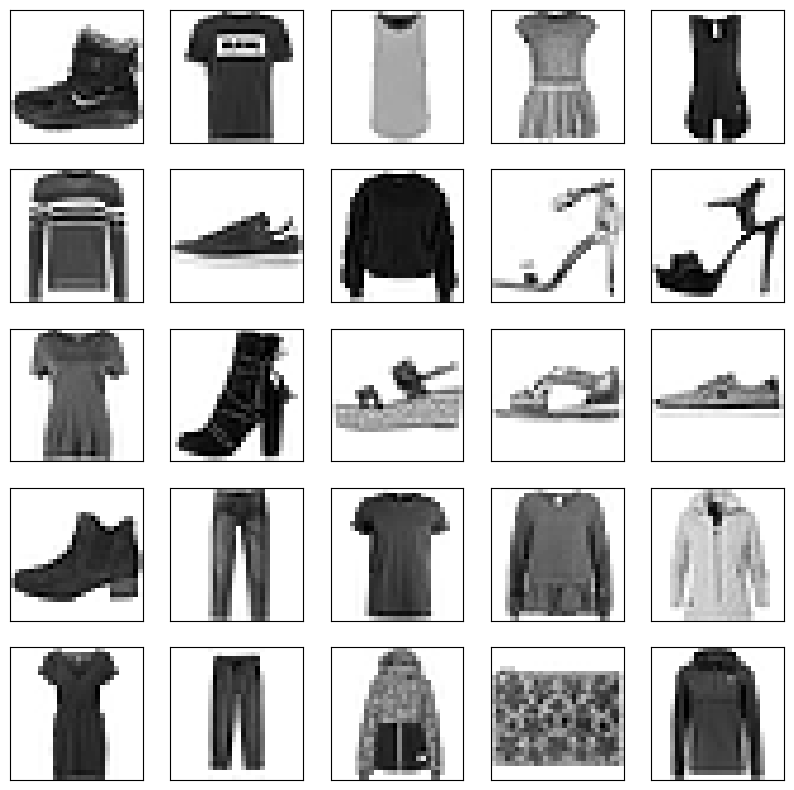

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

Normalize and reshape the data to fit into the Neural Network

In [4]:
# Normalizing the pixel values in the training set (x_train) by dividing them by 255.0
normal_x_train = x_train/255.
normal_x_test = x_test/255.

In [5]:
# Reshape the data to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Create the Network Architecture (Convulutional layer, pooling, flatten, 2 hidden layers, output layer)

In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Compile and Fit the Model

In [7]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x=normal_x_train, y=y_train, validation_data=(normal_x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4126 - accuracy: 0.8520 - val_loss: 0.3189 - val_accuracy: 0.8842
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2718 - accuracy: 0.9000 - val_loss: 0.2780 - val_accuracy: 0.9003
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2257 - accuracy: 0.9169 - val_loss: 0.2644 - val_accuracy: 0.9057
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1912 - accuracy: 0.9286 - val_loss: 0.2597 - val_accuracy: 0.9098
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1628 - accuracy: 0.9386 - val_loss: 0.2739 - val_accuracy: 0.9141
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1407 - accuracy: 0.9477 - val_loss: 0.2670 - val_accuracy: 0.9157
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1167 - accuracy: 0.9560 - val_loss: 0.2763 - val_accuracy:

Evaluate the Model's performance

In [8]:
test_loss, test_accuracy = cnn.evaluate(x=normal_x_test, y=y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.9101
Test Loss: 0.36315253376960754
Test Accuracy: 0.910099983215332


Visualize the model's predictions

1/1 [==============================] - 0s 14ms/step


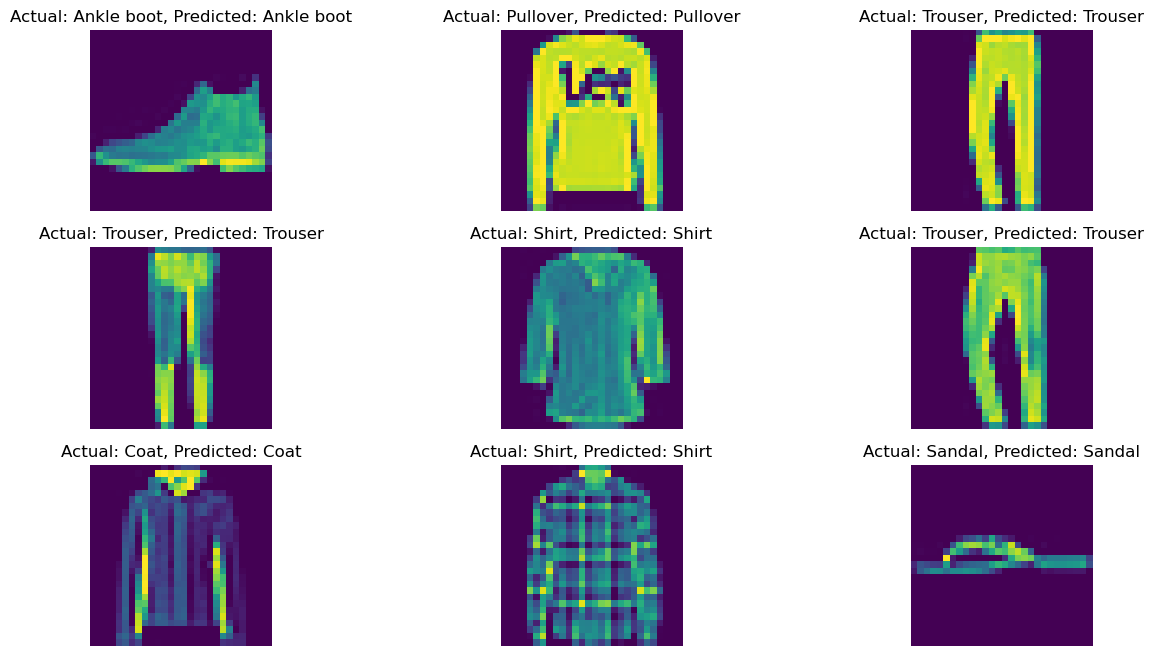

In [12]:
predictions = cnn.predict([normal_x_test[:9]])
plt.figure(figsize=(15, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    predicted_label = class_names[np.argmax(predictions[i])]
    actual_label = class_names[y_test[i]]
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')

plt.show()